# Overview of character counts

Introduction: xxx characters

Prediction:

Research question:

Conclusion:


# Introduction

We have chosen the Airbnb challenge as our topic. -Explain structure and content of report


# Data overview

Loading the dataset and necessary imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

airbnb_uc=pd.read_csv("listings_CPH.csv")

airbnb_uc.head()

id                                               name  host_id  \
0   6983                               Copenhagen 'N Livin'    16774   
1  26057                Lovely house - most attractive area   109777   
2  26473          City Centre Townhouse Sleeps 1-10 persons   112210   
3  29118                    Best Location in Cool Istedgade   125230   
4  31094  Beautiful, spacious, central, renovated Penthouse   129976   

  host_name  neighbourhood_group              neighbourhood   latitude  \
0     Simon                  NaN                    Nrrebro  55.686410   
1      Kari                  NaN                   Indre By  55.693070   
2     Julia                  NaN                   Indre By  55.676020   
3      Nana                  NaN  Vesterbro-Kongens Enghave  55.670230   
4      Ebbe                  NaN  Vesterbro-Kongens Enghave  55.666602   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  12.547410  Entire home/apt    898               3                172   
1  12.576490  Entire home/apt   2600               4                 59   
2  12.575400  Entire home/apt   3250               3                300   
3  12.555040  Entire home/apt    725               7                 24   
4  12.555283  Entire home/apt   1954               3                 19   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2022-06-21               1.08                               1   
1  2022-08-09               0.55                               1   
2  2022-09-10               2.06                               3   
3  2022-08-04               0.16                               1   
4  2022-08-22               0.13                               1   

   availability_365  number_of_reviews_ltm  license  
0                 0                      4      NaN  
1               303                      8      NaN  
2                56                      7      NaN  
3                59                      2      NaN  
4                 0                      2      NaN

Description of data set

In [3]:
airbnb_uc.describe()

id       host_id  neighbourhood_group      latitude  \
count  1.381500e+04  1.381500e+04                  0.0  13815.000000   
mean   1.719385e+17  1.064145e+08                  NaN     55.680569   
std    2.852538e+17  1.302801e+08                  NaN      0.021088   
min    6.983000e+03  1.171800e+04                  NaN     55.609510   
25%    1.907962e+07  1.356383e+07                  NaN     55.666110   
50%    3.931542e+07  4.656301e+07                  NaN     55.681190   
75%    5.665348e+17  1.553486e+08                  NaN     55.695770   
max    7.222925e+17  4.805803e+08                  NaN     55.742800   

          longitude         price  minimum_nights  number_of_reviews  \
count  13815.000000  13815.000000    13815.000000       13815.000000   
mean      12.557805   1205.878972        4.605574          18.571118   
std        0.033512   1433.143149       16.900153          36.402671   
min       12.435670      0.000000        1.000000           0.000000   
25%       12.540285    729.000000        2.000000           2.000000   
50%       12.555520    995.000000        3.000000           7.000000   
75%       12.580741   1368.500000        4.000000          20.000000   
max       12.651740  64900.000000     1111.000000         711.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count       12170.000000                    13815.000000      13815.000000   
mean            0.903816                        4.400651         93.302642   
std             1.110754                       21.298565        123.161958   
min             0.010000                        1.000000          0.000000   
25%             0.230000                        1.000000          0.000000   
50%             0.530000                        1.000000         20.000000   
75%             1.120000                        1.000000        174.000000   
max            24.020000                      179.000000        365.000000   

       number_of_reviews_ltm  license  
count           13815.000000      0.0  
mean                5.451104      NaN  
std                11.373977      NaN  
min                 0.000000      NaN  
25%                 0.000000      NaN  
50%                 3.000000      NaN  
75%                 6.000000      NaN  
max               471.000000      NaN

Checking for null values in each column

In [4]:
airbnb_uc.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             1
neighbourhood_group               13815
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        1645
reviews_per_month                  1645
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           13815
dtype: int64

Removing columns containing non-relevant data and replacing the null values in reviews per month with zero

In [5]:
airbnb_uc.drop(columns=["id", "name","host_id", "neighbourhood_group","license","host_name","last_review"], inplace=True, axis=1)
airbnb_uc.fillna({'reviews_per_month':0}, inplace=True)

# Data analysis and visualization

## Correlation

Seeing if there is any correlation between the numerical values in the data set.

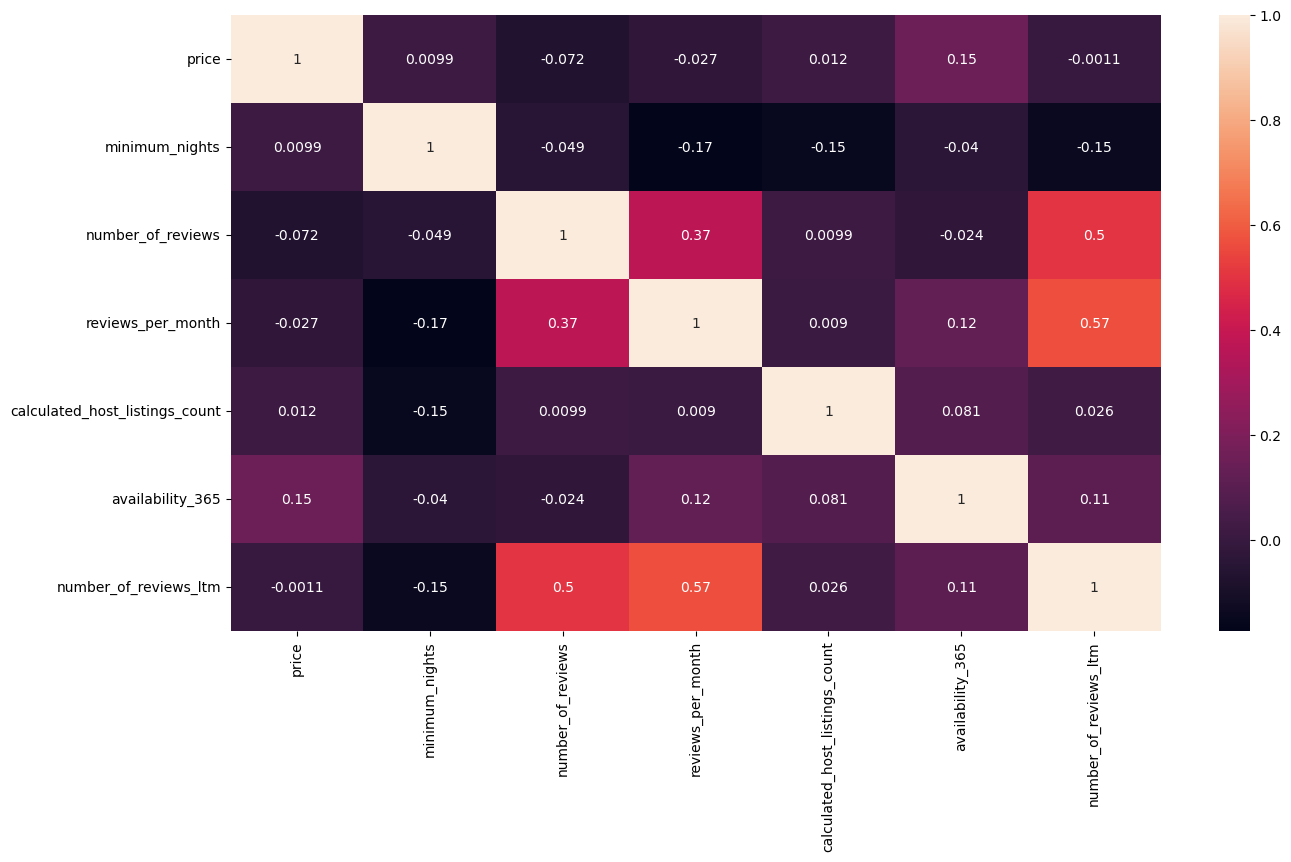

In [6]:
data=airbnb_uc[['price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']]
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(method="kendall"), annot=True, annot_kws={"size":10})
plt.show()

The only columns showing signs of correlation is the columns displaying information regarding number of reviews, apart from these correlation is very low. 

## Checking for outliers and preparing data set

Seeing if our data contains wrongful information or irregularities using boxplot for all numerical variables plotted using log.

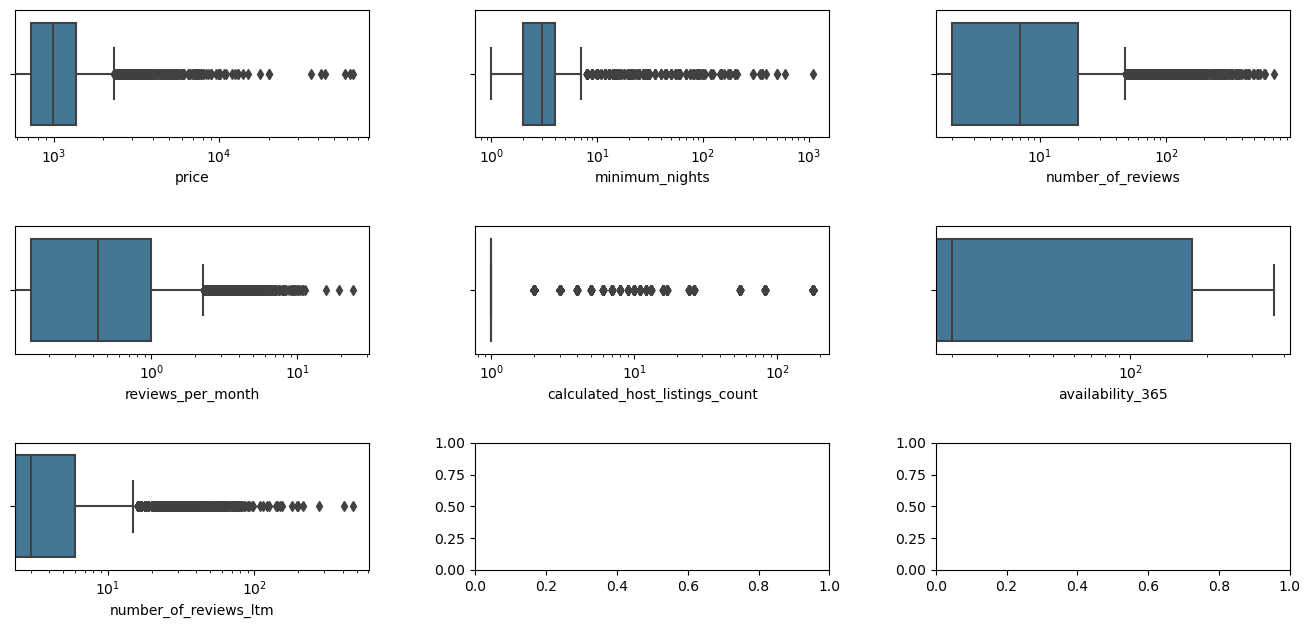

In [7]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6], [ax7, ax8, ax9]] = plt.subplots(3,3, figsize=(15,7))
plt.subplots_adjust(left=0.05 , bottom=0.1, right=0.9 , top=0.9, wspace=0.3, hspace=0.7)

ax1.set_xscale("log")
ax2.set_xscale("log")
ax3.set_xscale("log")
ax4.set_xscale("log")
ax5.set_xscale("log")
ax6.set_xscale("log")
ax7.set_xscale("log")



sns.boxplot(data=airbnb_uc, x='price',
            palette='mako',ax=ax1)
sns.boxplot(data=airbnb_uc,x='minimum_nights',
            palette='mako',ax=ax2)
sns.boxplot(data=airbnb_uc, x='number_of_reviews',
            palette='mako',ax=ax3)
sns.boxplot(data=airbnb_uc, x='reviews_per_month',
            palette='mako',ax=ax4)
sns.boxplot(data=airbnb_uc,x='calculated_host_listings_count',
            palette='mako',ax=ax5)
sns.boxplot(data=airbnb_uc, x='availability_365',
            palette='mako',ax=ax6)
sns.boxplot(data=airbnb_uc, x='number_of_reviews_ltm',
            palette='mako',ax=ax7)

plt.show()

From plot above it can be seen that columns for price and minimum nights are containing a substantial amount of outliers. For price, Isolation Forest is used to identify the outliers by isolating them in the data. Isolation Forest isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. A value of -1 means that the value is an outlier.

### Price

139


<AxesSubplot:xlabel='price'>

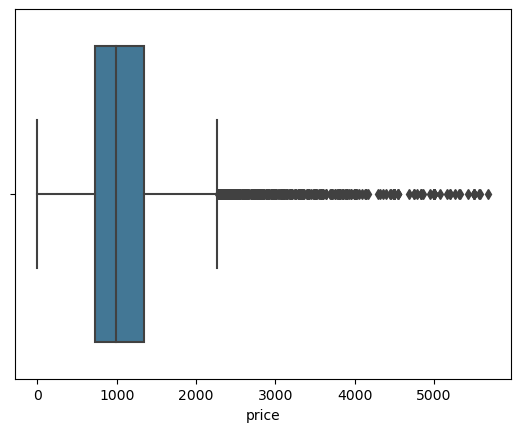

In [9]:
from sklearn.ensemble import IsolationForest

airbnb_uc[['price']].head()
model = IsolationForest(n_estimators=100, max_samples="auto", contamination=0.01)
model.fit(airbnb_uc[['price']])
airbnb_uc['price_scores'] = model.decision_function(airbnb_uc[['price']])
airbnb_uc['price_anomaly'] = model.predict(airbnb_uc[['price']])
airbnb_clean = airbnb_uc.loc[airbnb_uc['price_anomaly'] == 1]
airbnb_clean.drop(['price_scores','price_anomaly'], axis=1, inplace=True)

len(airbnb_uc.loc[airbnb_uc['price_anomaly'] == -1])
print(len(airbnb_uc.loc[(airbnb_uc['price'] > 5686) & (airbnb_uc['price_anomaly']==-1)]))

sns.boxplot(data=airbnb_clean, x='price',
            palette='mako')

By running Isolation Tree on a contamination of 0.01, 139 price anomalies have been detected and removed from the dataset. The maximum price for a airbnb in the dataset is now 5686. As seen from boxplot the distribution is now more even.

### Minimum nights

<AxesSubplot:xlabel='minimum_nights'>

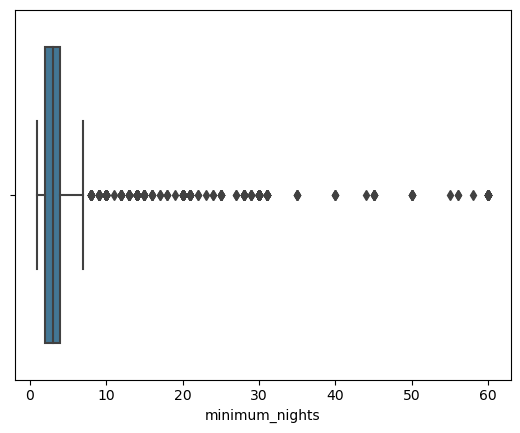

In [13]:
airbnb_clean = airbnb_clean.loc[airbnb_clean['minimum_nights'] <= 60]

sns.boxplot(data=airbnb_clean, x='minimum_nights',
            palette='mako')

For minimum nights, we assume that all values above 60 is outliers as a value of above 60 minimum nights is seen as unlikely.

### Availibility_365

In [14]:
len(airbnb_clean.loc[(airbnb_clean['availability_365'] == 0)])

4750

For availibility_365 it can be seen that a lot of the values (4745) of the values is zero, which means they are set as fully booked the following year. This may be wrongful information, but as they may be representative we will not remove them. 

## Neighbourhood listings and prices

Making a plot of the Airbnb locations colour coded by price, to see if location is a plays a role in price differences.

Populating the interactive namespace from numpy and matplotlib


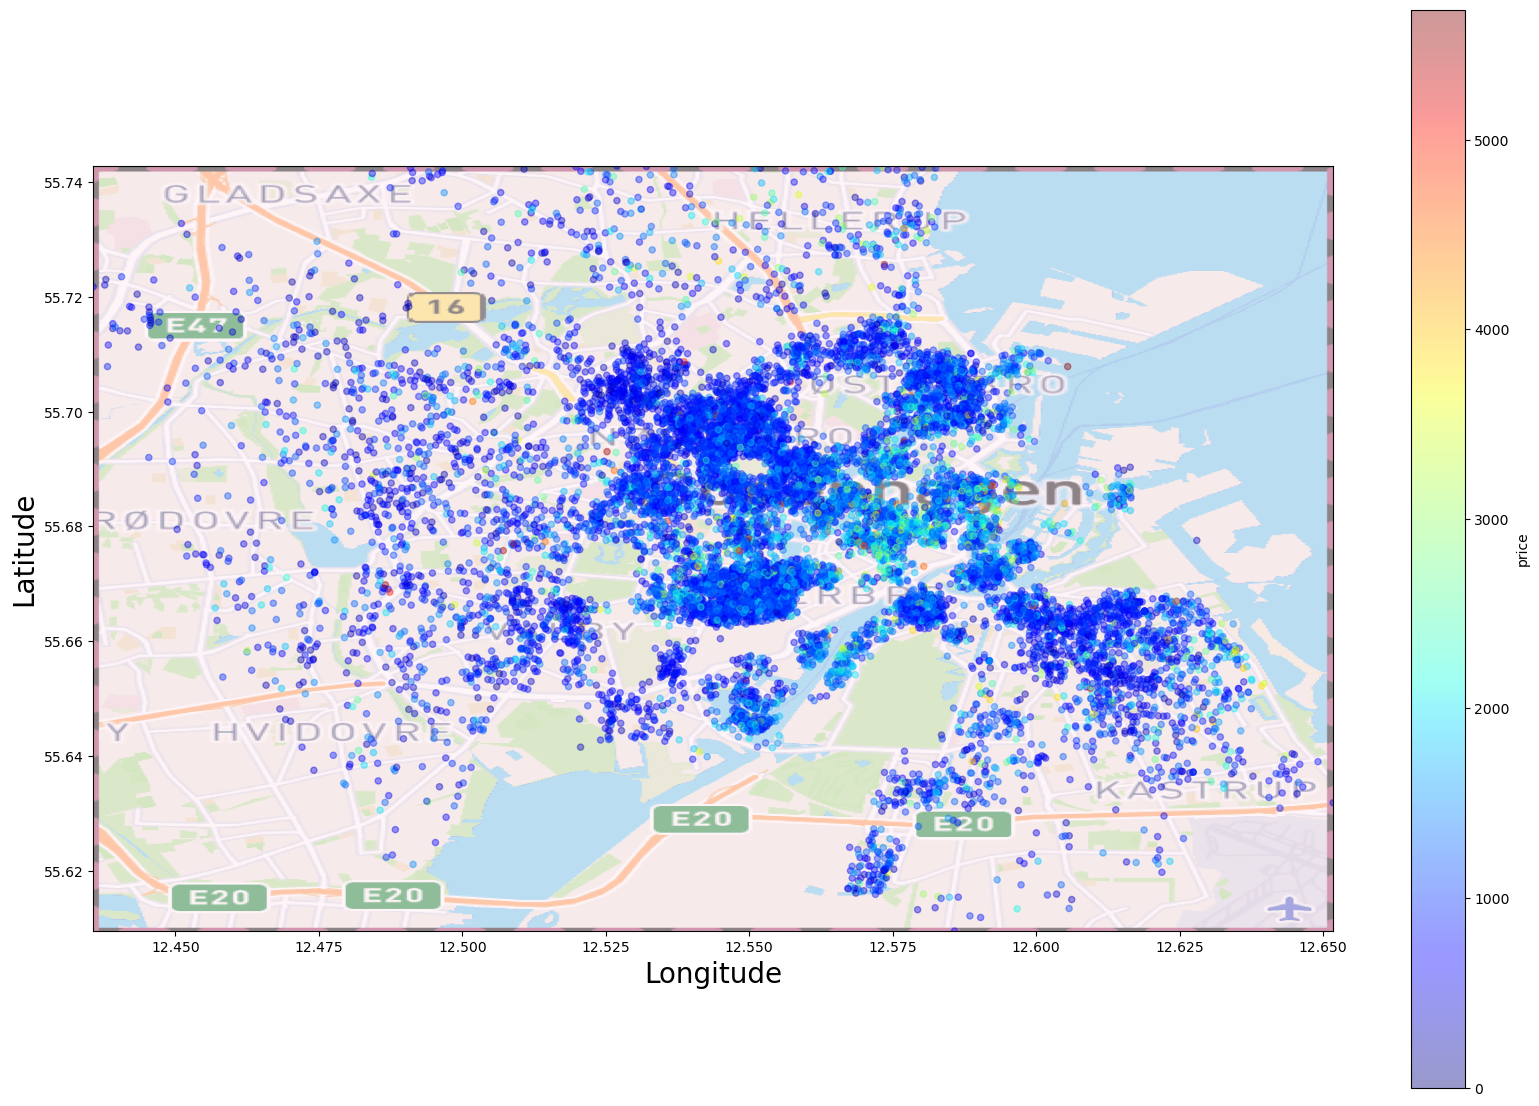

In [15]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
copenhagen_img = mpimg.imread('København2.png')
airbnb_clean.plot(kind="scatter", x="longitude", y="latitude", figsize=(20,14),c="price", cmap=plt.get_cmap("jet"),
                 colorbar=True, alpha=0.4)
plt.imshow(copenhagen_img, extent=[12.435670, 12.651740,55.609510,55.742800], alpha=0.5)
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
plt.ylim(55.609510, 55.742800)
plt.xlim(12.435670, 12.651740)
plt.show()

From plot it seems like the Airbnb rentals near the city center is valued higher.

Text(0, 0.5, 'Neighbourhood')

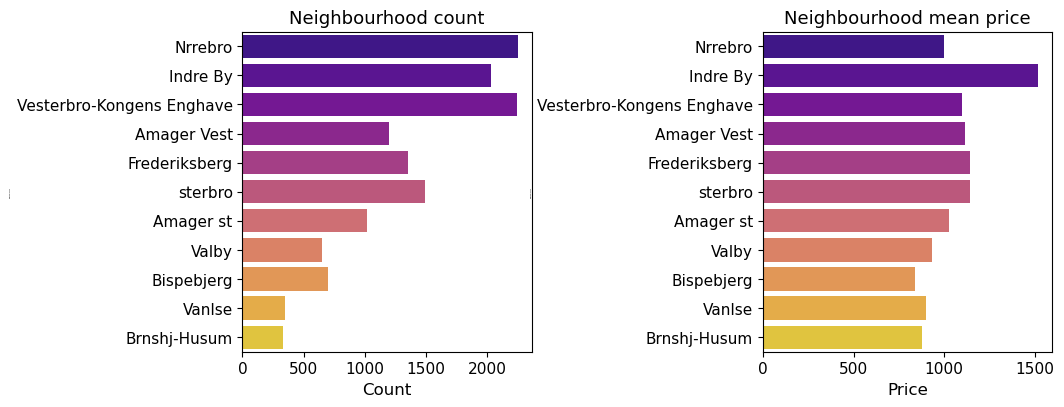

In [16]:
airbnb_clean.groupby("neighbourhood", as_index=False)['price'].mean()

plt.rc('xtick', labelsize=11)       
plt.rc('ytick', labelsize=11)       

fig, axes = plt.subplots(1,2, figsize=(9,4))
plt.subplots_adjust(left=0.0005 , bottom=0.1, right=0.9 , top=0.9, wspace=0.8, hspace=0.2)

ax1 = sns.countplot(y=airbnb_clean["neighbourhood"], palette="plasma", ax=axes[0])
axes[0].set_title("Neighbourhood count", fontsize=13)
ax1.set_xlabel("Count", fontsize = 12)
ax1.set_ylabel("Neighbourhood", fontsize = 0)


ax2=sns.barplot(data=airbnb_clean, x="price", y="neighbourhood", ci=False, palette="plasma", ax=axes[1])
axes[1].set_title("Neighbourhood mean price", fontsize=13)
ax2.set_xlabel("Price", fontsize = 12)
ax2.set_ylabel("Neighbourhood", fontsize = 0)

As seen from plot above, most of the airbnb rentals are in Indre by, Nørrebro and Vesterbro-Kongens Enghave which is located near the city center. Indre By is where the prices are averagely the highest, with Amager Vest coming second. 

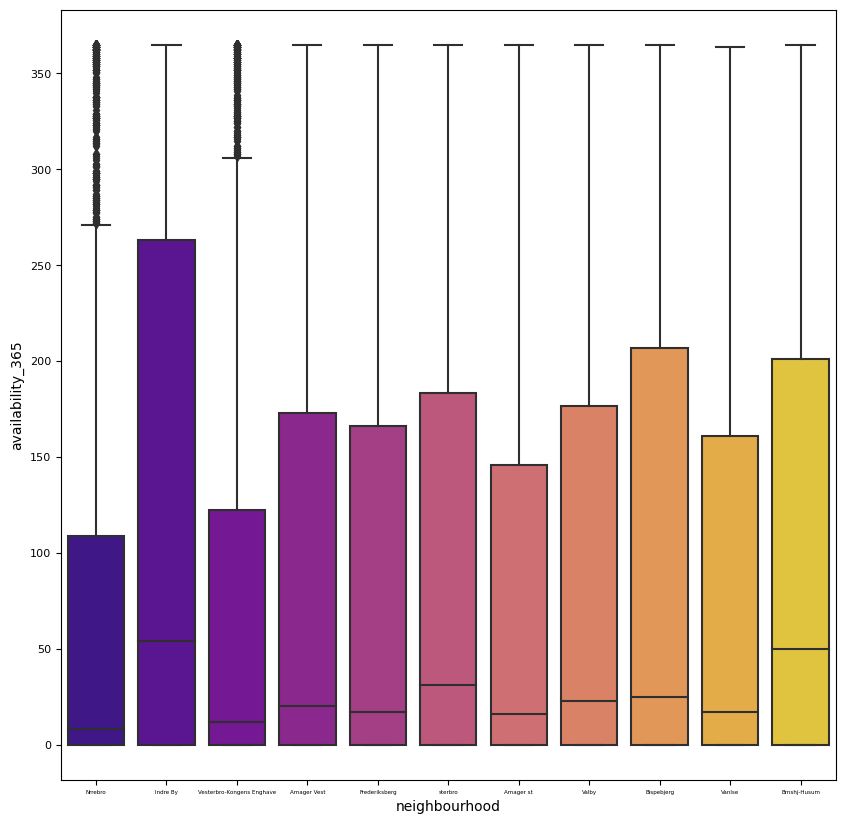

In [22]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb_clean, x='neighbourhood',y='availability_365',palette='plasma')
plt.rc('xtick', labelsize=5)       
plt.rc('ytick', labelsize=8)
plt.show()

Comparing neighbourshoods with availibility_365, it can be seen that Indre by has the highest amount of availible days in a year as well.

## Room type listings and prices

Checking if location has any impact on the room type.

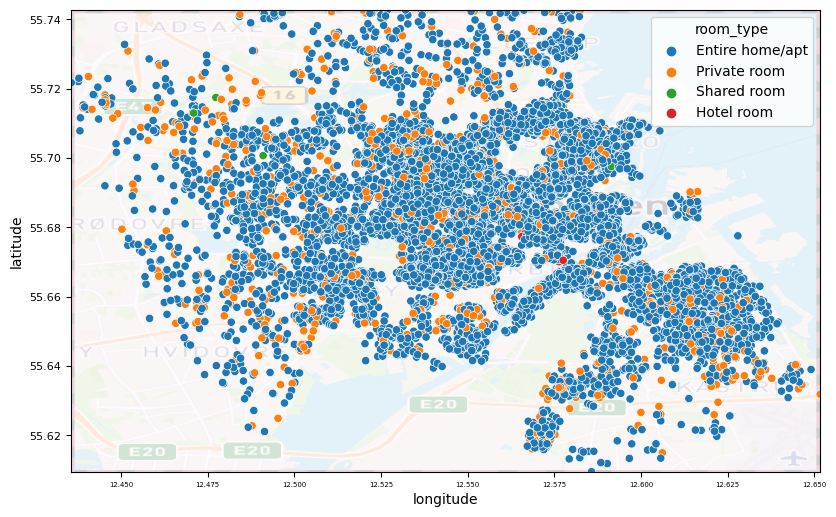

In [23]:
copenhagen_img = mpimg.imread('København2.png')
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb_clean.longitude,airbnb_clean.latitude,hue=airbnb_clean.room_type)
plt.imshow(copenhagen_img, extent=[12.435670, 12.651740,55.609510,55.742800], alpha=0.2)
plt.ioff()
plt.show()

Seems like the room types are pretty evenly distributed.

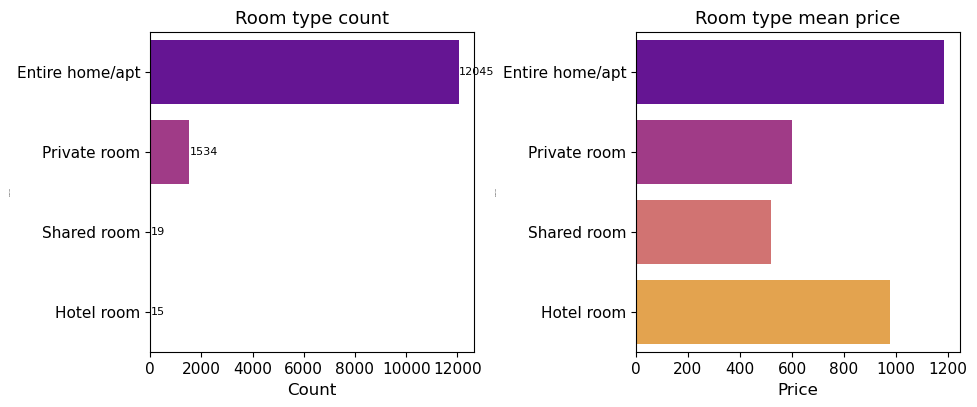

In [24]:
airbnb_clean.groupby("room_type", as_index=False)['price'].mean()

plt.rc('xtick', labelsize=11)       
plt.rc('ytick', labelsize=11)

fig, axes = plt.subplots(1,2, figsize=(9,4))
plt.subplots_adjust(left=0.0005 , bottom=0.1, right=0.9 , top=0.9, wspace=0.5, hspace=0.2)

ax1 = sns.countplot(y=airbnb_clean["room_type"],palette="plasma", ax=axes[0])
axes[0].set_title("Room type count", fontsize=13)
ax1.bar_label(ax1.containers[0], fontsize=8)
ax1.set_xlabel("Count", fontsize = 12)
ax1.set_ylabel("Room type", fontsize = 0)



ax2=sns.barplot(data=airbnb_clean, x="price", y="room_type", ci=False, palette="plasma", ax=axes[1])
axes[1].set_title("Room type mean price", fontsize=13)
ax2.set_xlabel("Price", fontsize = 12)
ax2.set_ylabel("Room type", fontsize = 0)

plt.show()

Entire rooms and apartements has the highest mean price, altough must be noted that almost all of the listings is in this category. 

Populating the interactive namespace from numpy and matplotlib


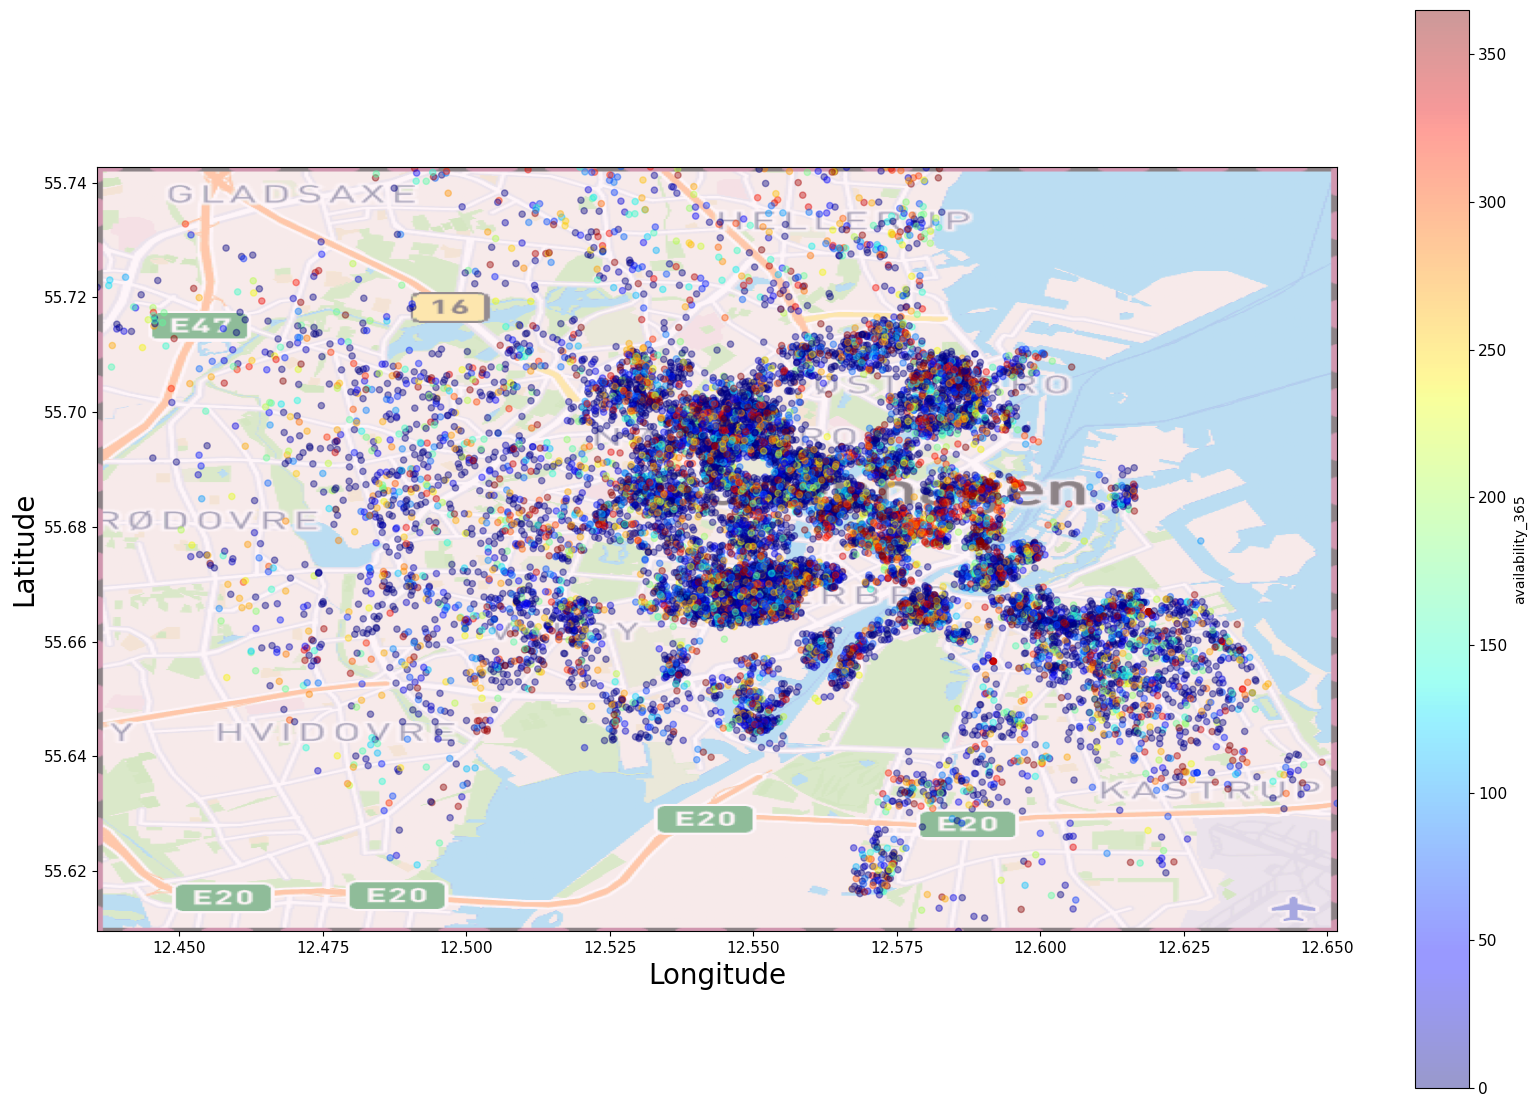

In [25]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
copenhagen_img = mpimg.imread('København2.png')
airbnb_clean.plot(kind="scatter", x="longitude", y="latitude", figsize=(20,14),c="availability_365", cmap=plt.get_cmap("jet"),
                 colorbar=True, alpha=0.4)
plt.imshow(copenhagen_img, extent=[12.435670, 12.651740,55.609510,55.742800], alpha=0.5)
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
plt.ylim(55.609510, 55.742800)
plt.xlim(12.435670, 12.651740)
plt.show()

Room type plotted against availibility in a year gives no clear indications.

## Cleaning data set for further analysis

### Normalizing numerical values

Normalizing the numerical variables of the dataset with values from 0 to 1.

In [26]:
def normalizing(column):
    new_column = (column - column.min()) / (column.max() - column.min())
    return new_column

airbnb_clean['minimum_nights'] = normalizing(airbnb_clean['minimum_nights'])
airbnb_clean['number_of_reviews'] = normalizing(airbnb_clean['number_of_reviews'])
airbnb_clean['reviews_per_month'] = normalizing(airbnb_clean['reviews_per_month'])
airbnb_clean['calculated_host_listings_count'] = normalizing(airbnb_clean['calculated_host_listings_count'])
airbnb_clean['availability_365'] = normalizing(airbnb_clean['availability_365'])
airbnb_clean['number_of_reviews_ltm'] = normalizing(airbnb_clean['number_of_reviews_ltm'])

### Creating dummy variables

Creating dummy variables for categorical variables neighbourhood and room type.

In [27]:
neighbourhood = pd.get_dummies(airbnb_clean['neighbourhood'].str.lower().str.replace(' ', '_'))
airbnb_clean = pd.merge(airbnb_clean, neighbourhood, left_index=True, right_index=True)
airbnb_clean = airbnb_clean.drop('neighbourhood', 1)

room_type = pd.get_dummies(airbnb_clean['room_type'])
airbnb = pd.merge(airbnb_clean, room_type, left_index=True, right_index=True)
airbnb = airbnb.drop('room_type', 1)

airbnb.head()

latitude  longitude  price  minimum_nights  number_of_reviews  \
0  55.686410  12.547410    898        0.033898           0.241913   
1  55.693070  12.576490   2600        0.050847           0.082982   
2  55.676020  12.575400   3250        0.033898           0.421941   
3  55.670230  12.555040    725        0.101695           0.033755   
4  55.666602  12.555283   1954        0.033898           0.026723   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0           0.044963                        0.000000          0.000000   
1           0.022898                        0.000000          0.830137   
2           0.085762                        0.011236          0.153425   
3           0.006661                        0.000000          0.161644   
4           0.005412                        0.000000          0.000000   

   number_of_reviews_ltm  amager_st  ...  indre_by  nrrebro  sterbro  valby  \
0               0.008493          0  ...         0        1        0      0   
1               0.016985          0  ...         1        0        0      0   
2               0.014862          0  ...         1        0        0      0   
3               0.004246          0  ...         0        0        0      0   
4               0.004246          0  ...         0        0        0      0   

   vanlse  vesterbro-kongens_enghave  Entire home/apt  Hotel room  \
0       0                          0                1           0   
1       0                          0                1           0   
2       0                          0                1           0   
3       0                          1                1           0   
4       0                          1                1           0   

   Private room  Shared room  
0             0            0  
1             0            0  
2             0            0  
3             0            0  
4             0            0  

[5 rows x 24 columns]